In [8]:
import wget

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

wget.download(url, '')

100% [......................................................................] 109540975 / 109540975

'pizza_steak.zip'

In [13]:
import os
os.listdir()

['.ipynb_checkpoints',
 'conv_neural_nets.ipynb',
 'learn_conv.ipynb',
 'neural_network_classification.ipynb',
 'neural_network_regression.ipynb',
 'pizza_steak.zip',
 'USA_Housing.csv']

In [14]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'conv_neural_nets.ipynb',
 'learn_conv.ipynb',
 'neural_network_classification.ipynb',
 'neural_network_regression.ipynb',
 'pizza_steak',
 'pizza_steak.zip',
 'USA_Housing.csv']

In [21]:
os.listdir("pizza_steak/")

['test', 'train']

In [22]:
os.listdir("pizza_steak/test/")

['pizza', 'steak']

In [23]:
os.listdir("pizza_steak/test/pizza/")

['1001116.jpg',
 '1032754.jpg',
 '103708.jpg',
 '1060407.jpg',
 '106507.jpg',
 '1067986.jpg',
 '1106738.jpg',
 '1119571.jpg',
 '11297.jpg',
 '1152100.jpg',
 '1179703.jpg',
 '1180001.jpg',
 '1180273.jpg',
 '1183595.jpg',
 '1202689.jpg',
 '121960.jpg',
 '1220156.jpg',
 '1223284.jpg',
 '1226346.jpg',
 '1228171.jpg',
 '124815.jpg',
 '1265335.jpg',
 '1275885.jpg',
 '1280320.jpg',
 '129666.jpg',
 '1315645.jpg',
 '1342321.jpg',
 '1380247.jpg',
 '138961.jpg',
 '1398213.jpg',
 '139952.jpg',
 '139987.jpg',
 '140016.jpg',
 '1412011.jpg',
 '1445608.jpg',
 '144631.jpg',
 '1459760.jpg',
 '1475479.jpg',
 '1484836.jpg',
 '148765.jpg',
 '1503858.jpg',
 '1506213.jpg',
 '1507019.jpg',
 '1512557.jpg',
 '153195.jpg',
 '1555015.jpg',
 '1594097.jpg',
 '1618659.jpg',
 '1636919.jpg',
 '1655630.jpg',
 '1686938.jpg',
 '1687143.jpg',
 '1691503.jpg',
 '1694874.jpg',
 '1765727.jpg',
 '177513.jpg',
 '1843754.jpg',
 '1895182.jpg',
 '1925494.jpg',
 '194643.jpg',
 '194784.jpg',
 '1949644.jpg',
 '195160.jpg',
 '1962101.

In [29]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [32]:
steak_train = len(os.listdir("pizza_steak/train/steak/"))
steak_train

750

In [36]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


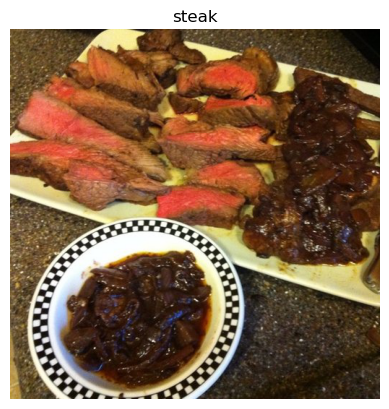

In [54]:
ran_img = view_random_image(target_dir="pizza_steak/train/",
                           target_class="steak")

In [56]:
ran_img

array([[[115,  87,  48],
        [116,  88,  48],
        [116,  88,  48],
        ...,
        [  2,   2,   0],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[119,  91,  52],
        [111,  83,  44],
        [110,  82,  42],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  3,   3,   1]],

       [[116,  91,  51],
        [106,  81,  41],
        [106,  81,  41],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       ...,

       [[185, 151,  62],
        [187, 153,  66],
        [190, 158,  75],
        ...,
        [ 55,  40,  33],
        [ 60,  43,  36],
        [ 57,  40,  33]],

       [[192, 158,  71],
        [186, 154,  69],
        [189, 156,  75],
        ...,
        [ 51,  34,  27],
        [ 53,  36,  29],
        [ 49,  32,  25]],

       [[194, 159,  75],
        [184, 152,  69],
        [185, 152,  71],
        ...,
        [ 57,  40,  33],
        [ 59,  40,  34],
        [ 57,  38,  32]]

In [57]:
ran_img.shape

(512, 512, 3)

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 104s 2s/step - loss: 0.5768 - accuracy: 0.6967 - val_loss: 0.4914 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 134s 3s/step - loss: 0.4703 - accuracy: 0.8000 - val_loss: 0.4348 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 159s 3s/step - loss: 0.4326 - accuracy: 0.8067 - val_loss: 0.5387 - val_accuracy: 0.7000
Epoch 4/5
47/47 [==============================] - 151s 3s/step - loss: 0.4121 - accuracy: 0.8227 - val_loss: 0.3758 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 148s 3s/step - loss: 0.3804 - accuracy: 0.8393 - val_loss: 0.3855 - val_accuracy: 0.8360


In [59]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [71]:
train_dir

'pizza_steak/train/'